# TimML Exercises

## Exercise 1: A well in uniform flow

Consider a well in the middle aquifer of a three aquifer system. Aquifer properties are given in Table 1. The well is located at $(x,y)=(0,0)$, the discharge is $Q=10,000$ m$^3$/d and the radius is 0.2 m. There is a uniform flow from West to East with a gradient of 0.002. The head is fixed to 20 m at a distance of 10,000 m downstream of the well. Here is the cookbook recipe to build this model:
    
* Set figures to be inline with `%matplotlib inline`
* Import everything from TimML: `from timml import *`
* Create the model and give it a name, for example `ml` with the command `ml = Model(Naquifers, k, zb, zt, c)` (substitute the correct lists for $k$, $z_b$, $z_t$, $c$).
* Enter the well with the command `w = Well(ml, xw, yw, Qw, rw, layers)`, where the well is called `w`.
* Enter uniform flow with the command `Uflow(ml, grad, angle)`.
* Enter the reference head with `Constant(ml, xr, yr, head, layer)`.
* Solve the model `ml.solve()`

#### Table 1: Aquifer data for exercise 1
|             |$k$ (m/d)|$z_b$ (m)|$z_t$|$c$ (days)|
|-------------|--------:|--------:|----:|---------:|
|Aquifer 0    |    10   |   -20   |  0  |          |
|Leaky Layer 1|         |   -40   | -20 |  4000    |   
|Aquifer 1    |    20   |   -80   | -40 |          |
|Leaky Layer 2|         |   -90   | -80 |  10000   | 
|Aquifer 2    |     5   |   -140  | -90 |          ||


In [1]:
%matplotlib notebook
from timml import *
from pylab import *

In [2]:
ml = Model(k=[10, 20, 5],
           zb=[-20, -80, -140], 
           zt=[0, -40, -90], 
           c=[4000, 10000] )
w = Well(ml, xw=0, yw=0, Qw=10000, rw=0.2, layers=1 )
Constant(ml, xr=10000, yr=0, head=20, layer=0 )
Uflow(ml, grad=0.002, angle=0 )
ml.solve()

Starting solve
Number of elements:  3
Percent progress:  0  
size of matrix (1, 1)
Solution complete


### Questions:
#### Exercise 1a
What are the leakage factors of the aquifer system?

In [3]:
print 'The leakage factors of the aquifers are:'
print ml.aq.lab

The leakage factors of the aquifers are:
[  790.84743012  1430.58042146]


#### Exercise 1b
What is the head at the well?

In [4]:
print 'The head at the well is:'
print ml.headVector(w.xw, w.yw)

The head at the well is:
[ 36.67647522  20.06236932  37.57926213]


#### Exercise 1c
Create a contour plot of the head in the three aquifers. Use a window with lower left hand corner $(x,y)=(−3000,−3000)$ and upper right hand corner $(x,y)=(3000,3000)$. Notice that the heads in the three aquifers are almost equal at three times the largest leakage factor.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


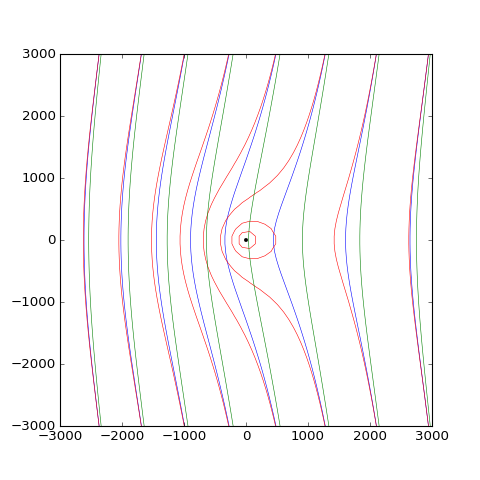

done with contouring
done with contouring
done with contouring


In [5]:
timcontour(ml, -3000, 3000, 50, -3000, 3000, 50, layers=3, levels=10, size=(6,6))

#### Exercise 1d
Create a contour plot of the head in aquifer 1 with labels along the contours. Use a contour interval of 1
m.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


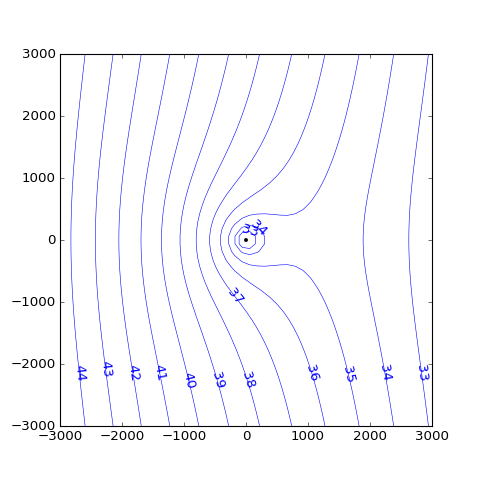

done with contouring


//anaconda/lib/python2.7/site-packages/matplotlib/contour.py:380: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


In [6]:
timcontour(ml, -3000, 3000, 50, -3000, 3000, 50, layers=[1], levels=[30, 45, 1] , labels=1, labelfmt='%1.0f', size=(6,6))

#### Exercise 1e
Create a contour plot with a vertical cross-section below it. (A contour plot without any contours may be created by specifying `layers=0`.) Start three pathlines from $(x,y)=(-2000,-1000)$ at levels $z=-120$, $z=-60$, and $z=-10$. Try a few other starting locations.

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


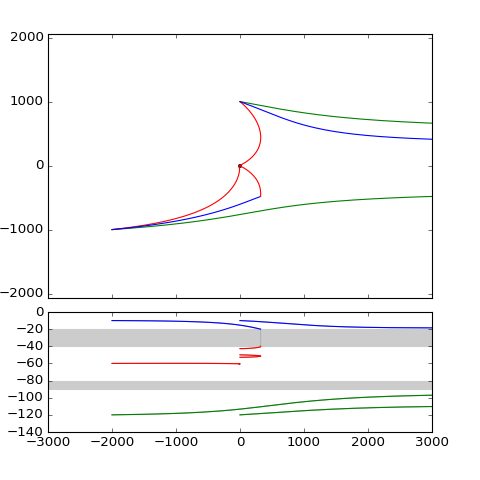

reached maximum number of steps
reached element of type well
reached element of type well
reached maximum number of steps
reached element of type well
reached maximum number of steps


In [7]:
# Exercise 1e
timcontour(ml, -3000, 3000, 50, -3000, 3000,50, layers=0, levels=20, xsec=1, labels=1, size=(6,6))
timtracelines(ml, -2000 * ones(3), -1000 * ones(3), [-120, -60, -10], 50, xsec=1)
timtracelines(ml, 0 * ones(3), 1000 * ones(3), [-120, -50, -10], 50, xsec=1)

#### Exercise 1f
Add an abandoned well that is screened in both aquifer 0 and aquifer 1, located at $(x, y) = (100, 100)$ and create contour plot of all aquifers near the well (from (-200,-200) till (200,200)). What are the discharge and the head at the abandoned well? Note that you have to solve the model again!

In [8]:
wabandoned = Well(ml, xw=100, yw=100, Qw=0, rw=0.2, layers=[0, 1])
ml.solve()

Starting solve
Number of elements:  4
Percent progress:  0  
size of matrix (3, 3)
Solution complete


grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


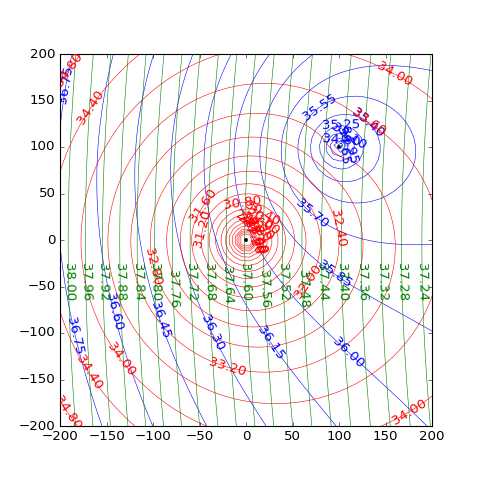

done with contouring
done with contouring
done with contouring


In [9]:
timcontour(ml, -200, 200, 50, -200, 200, 50, layers=3, levels=20, labels=1, size=(6,6))

In [10]:
print 'The head at the abandoned well is:'
print ml.headVector(wabandoned.xw, wabandoned.yw)
print 'The discharge at the abandoned well is:'
print wabandoned.parameters

The head at the abandoned well is:
[ 33.61982591  33.61982591  37.41052643]
The discharge at the abandoned well is:
[[ 431.63771864]
 [-431.63771864]]
